In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Load the dataset
df1 = pd.read_excel('bng2eng2/train/ConscientiousnessTrain.xlsx')
df2 = pd.read_excel('bng2eng2/train/AgreeablenessTrain.xlsx')
df3 = pd.read_excel('bng2eng2/train/NeuroticismTrain.xlsx')
df4 = pd.read_excel('bng2eng2/train/ExtroversionTrain.xlsx')
df5 = pd.read_excel('bng2eng2/train/OpennessTrain.xlsx')
train_df = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)
train_df = train_df.drop("status", axis='columns')

df6 = pd.read_excel('bng2eng2/test/ConscientiousnessTest.xlsx')
df7 = pd.read_excel('bng2eng2/test/AgreeablenessTest.xlsx')
df8 = pd.read_excel('bng2eng2/test/NeuroticismTest.xlsx')
df9 = pd.read_excel('bng2eng2/test/ExtroversionTest.xlsx')
df10 = pd.read_excel('bng2eng2/test/OpennessTest.xlsx')
test_df = pd.concat([df6, df7, df8, df9, df10], ignore_index=True)
test_df = test_df.drop("status", axis='columns')

# Data preprocessing
# Convert text to lowercase
train_df['status_text'] = train_df['status_text'].apply(lambda x: x.lower())
test_df['status_text'] = test_df['status_text'].apply(lambda y: str(y).lower())

# Remove stopwords
stop_words = set(stopwords.words('english'))
train_df['status_text'] = train_df['status_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
test_df['status_text'] = test_df['status_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# Tokenization
train_df['status_text'] = train_df['status_text'].apply(lambda x: word_tokenize(x))
test_df['status_text'] = test_df['status_text'].apply(lambda x: word_tokenize(x))

# Stemming
stemmer = PorterStemmer()
train_df['status_text'] = train_df['status_text'].apply(lambda x: [stemmer.stem(word) for word in x])
test_df['status_text'] = test_df['status_text'].apply(lambda x: [stemmer.stem(word) for word in x])
test_df

# Convert list of tokens back to text
train_df['status_text'] = train_df['status_text'].apply(lambda x: ' '.join(x))
test_df['status_text'] = test_df['status_text'].apply(lambda x: ' '.join(x))
train_df

# Feature extraction using bag-of-words model
count_vectorizer = CountVectorizer()
X_train_counts = count_vectorizer.fit_transform(train_df['status_text'])
X_test_counts = count_vectorizer.transform(test_df['status_text'])

# Feature extraction using TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(train_df['status_text'])
X_test_tfidf = tfidf_vectorizer.transform(test_df['status_text'])

# # Build a Multinomial Naive Bayes model using bag-of-words features
# mnb_counts_model = MultinomialNB()
# mnb_counts_model.fit(X_train_counts, train_df['label'])

## Multinomial Naive Bayes

In [2]:
# Build a Multinomial Naive Bayes model using bag-of-words features with different alpha values
alpha_values = [0.3, 0.35, 0.4, 0.5]
for alpha in alpha_values:
    mnb_counts_model = MultinomialNB(alpha=alpha)
    mnb_counts_model.fit(X_train_counts, train_df['label'])

    # Evaluate the model on the testing set using bag-of-words features
    y_pred_counts = mnb_counts_model.predict(X_test_counts)
    accuracy_counts = accuracy_score(test_df['label'], y_pred_counts)

    print("Accuracy using bag-of-words features with alpha={}:".format(alpha), accuracy_counts)


# Evaluate the model on the testing set using bag-of-words features
y_pred_counts = mnb_counts_model.predict(X_test_counts)
accuracy_counts = accuracy_score(test_df['label'], y_pred_counts)

print("Accuracy using bag-of-words features:", accuracy_counts)

Accuracy using bag-of-words features with alpha=0.3: 0.3482587064676617
Accuracy using bag-of-words features with alpha=0.35: 0.351575456053068
Accuracy using bag-of-words features with alpha=0.4: 0.3548922056384743
Accuracy using bag-of-words features with alpha=0.5: 0.34991708126036486
Accuracy using bag-of-words features: 0.34991708126036486


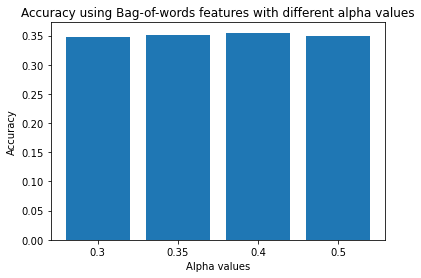

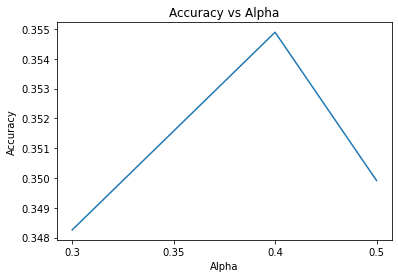

In [3]:
alpha_values = ['0.3', '0.35', '0.4', '0.5']
accuracies = [0.3482587064676617, 0.351575456053068, 0.3548922056384743, 0.34991708126036486]

plt.bar(alpha_values, accuracies)
plt.title('Accuracy using Bag-of-words features with different alpha values')
plt.xlabel('Alpha values')
plt.ylabel('Accuracy')
plt.show()
plt.plot(alpha_values, accuracies)
plt.title('Accuracy vs Alpha')
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.show()

In [4]:
# # Build a Multinomial Naive Bayes model using TF-IDF features
# mnb_tfidf_model = MultinomialNB()
# mnb_tfidf_model.fit(X_train_tfidf, train_df['label'])

# Build a Multinomial Naive Bayes model using TF-IDF features with different alpha values
alpha_values = [0.1, 0.2, 0.29, 0.3, 0.35, 0.4, 0.5, 0.7]
for alpha in alpha_values:
    mnb_tfidf_model = MultinomialNB(alpha=alpha)
    mnb_tfidf_model.fit(X_train_tfidf, train_df['label'])

    # Evaluate the model on the testing set using TF-IDF features
    y_pred_tfidf = mnb_tfidf_model.predict(X_test_tfidf)
    accuracy_tfidf = accuracy_score(test_df['label'], y_pred_tfidf)

    print("Accuracy using MNB+ TF-IDF features with alpha={}:".format(alpha), accuracy_tfidf*100)

# Evaluate the model on the testing set using TF-IDF features
# y_pred_tfidf = mnb_tfidf_model.predict(X_test_tfidf)
# accuracy_tfidf = accuracy_score(test_df['label'], y_pred_tfidf)
# print("Accuracy using TF-IDF features:", accuracy_tfidf)

Accuracy using MNB+ TF-IDF features with alpha=0.1: 32.50414593698176
Accuracy using MNB+ TF-IDF features with alpha=0.2: 33.16749585406302
Accuracy using MNB+ TF-IDF features with alpha=0.29: 34.32835820895522
Accuracy using MNB+ TF-IDF features with alpha=0.3: 34.660033167495854
Accuracy using MNB+ TF-IDF features with alpha=0.35: 33.99668325041459
Accuracy using MNB+ TF-IDF features with alpha=0.4: 32.83582089552239
Accuracy using MNB+ TF-IDF features with alpha=0.5: 33.16749585406302
Accuracy using MNB+ TF-IDF features with alpha=0.7: 32.66998341625207


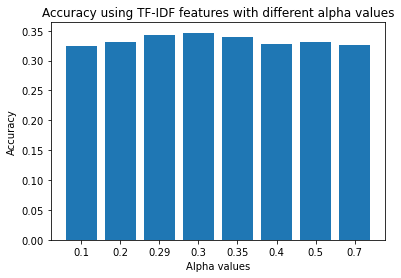

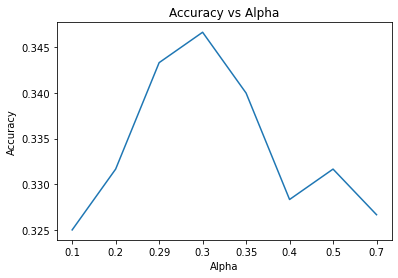

In [5]:
alpha_values = ['0.1', '0.2', '0.29', '0.3', '0.35', '0.4', '0.5', '0.7']
accuracies = [ 0.3250414593698176, 0.3316749585406302, 0.3432835820895522, 0.34660033167495854, 0.3399668325041459, 0.3283582089552239, 0.3316749585406302, 0.3266998341625207]

plt.bar(alpha_values, accuracies)
plt.title('Accuracy using TF-IDF features with different alpha values')
plt.xlabel('Alpha values')
plt.ylabel('Accuracy')
plt.show()
plt.plot(alpha_values, accuracies)
plt.title('Accuracy vs Alpha')
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.show()

## Random Forest

In [6]:
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train_tfidf, train_df['label'])

# Evaluate the model on the testing set using TF-IDF features
y_pred_rf = rf_model.predict(X_test_tfidf)

# Calculate accuracy, F1 score, precision, recall
accuracy_rf_tfidf = accuracy_score(test_df['label'], y_pred_rf)
f1_rf_tfidf = f1_score(test_df['label'], y_pred_rf, average='macro')
precision_rf_tfidf = precision_score(test_df['label'], y_pred_rf, average='macro')
recall_rf_tfidf = recall_score(test_df['label'], y_pred_rf, average='macro')

print("Accuracy using Random Forest(100) and TF-IDF features: {:.2f}%".format(accuracy_rf_tfidf*100))
print("F1 Score using Random Forest(100) and TF-IDF features: {:.2f}%".format(f1_rf_tfidf*100))
print("Precision using Random Forest(100) and TF-IDF features: {:.2f}%".format(precision_rf_tfidf*100))
print("Recall using Random Forest(100) and TF-IDF features: {:.2f}%".format(recall_rf_tfidf*100))

Accuracy using Random Forest(100) and TF-IDF features: 29.85%
F1 Score using Random Forest(100) and TF-IDF features: 28.78%
Precision using Random Forest(100) and TF-IDF features: 29.61%
Recall using Random Forest(100) and TF-IDF features: 29.12%


In [7]:
rf_model3 = RandomForestClassifier(n_estimators=150)
rf_model3.fit(X_train_tfidf, train_df['label'])

# Evaluate the model on the testing set using TF-IDF features
y_pred_rf3 = rf_model3.predict(X_test_tfidf)

# Calculate accuracy, F1 score, precision, recall
accuracy_rf_tfidf3 = accuracy_score(test_df['label'], y_pred_rf3)
f1_rf_tfidf3 = f1_score(test_df['label'], y_pred_rf3, average='macro')
precision_rf_tfidf3 = precision_score(test_df['label'], y_pred_rf3, average='macro')
recall_rf_tfidf3 = recall_score(test_df['label'], y_pred_rf3, average='macro')

print("Accuracy using Random Forest(400) and TF-IDF features: {:.2f}%".format(accuracy_rf_tfidf3*100))
print("F1 Score using Random Forest(400) and TF-IDF features: {:.2f}%".format(f1_rf_tfidf3*100))
print("Precision using Random Forest(400) and TF-IDF features: {:.2f}%".format(precision_rf_tfidf3*100))
print("Recall using Random Forest(400) and TF-IDF features: {:.2f}%".format(recall_rf_tfidf3*100))

Accuracy using Random Forest(400) and TF-IDF features: 30.02%
F1 Score using Random Forest(400) and TF-IDF features: 28.66%
Precision using Random Forest(400) and TF-IDF features: 29.51%
Recall using Random Forest(400) and TF-IDF features: 29.09%


In [8]:
rf_model1 = RandomForestClassifier(n_estimators=200)
rf_model1.fit(X_train_tfidf, train_df['label'])

# Evaluate the model on the testing set using TF-IDF features
y_pred_rf1 = rf_model1.predict(X_test_tfidf)
# Calculate accuracy, F1 score, precision, recall
accuracy_rf_tfidf1 = accuracy_score(test_df['label'], y_pred_rf1)
f1_rf_tfidf1 = f1_score(test_df['label'], y_pred_rf1, average='macro')
precision_rf_tfidf1 = precision_score(test_df['label'], y_pred_rf1, average='macro')
recall_rf_tfidf1 = recall_score(test_df['label'], y_pred_rf1, average='macro')

print("Accuracy using Random Forest(200) and TF-IDF features: {:.2f}%".format(accuracy_rf_tfidf1*100))
print("F1 Score using Random Forest(200) and TF-IDF features: {:.2f}%".format(f1_rf_tfidf1*100))
print("Precision using Random Forest(200) and TF-IDF features: {:.2f}%".format(precision_rf_tfidf1*100))
print("Recall using Random Forest(200) and TF-IDF features: {:.2f}%".format(recall_rf_tfidf1*100))

Accuracy using Random Forest(200) and TF-IDF features: 32.67%
F1 Score using Random Forest(200) and TF-IDF features: 31.51%
Precision using Random Forest(200) and TF-IDF features: 33.05%
Recall using Random Forest(200) and TF-IDF features: 31.74%


In [9]:
rf_model1 = RandomForestClassifier(n_estimators=250)
rf_model1.fit(X_train_tfidf, train_df['label'])

# Evaluate the model on the testing set using TF-IDF features
y_pred_rf1 = rf_model1.predict(X_test_tfidf)

# Calculate accuracy, F1 score, precision, recall
accuracy_rf_tfidf1 = accuracy_score(test_df['label'], y_pred_rf1)
f1_rf_tfidf1 = f1_score(test_df['label'], y_pred_rf1, average='macro')
precision_rf_tfidf1 = precision_score(test_df['label'], y_pred_rf1, average='macro')
recall_rf_tfidf1 = recall_score(test_df['label'], y_pred_rf1, average='macro')

print("Accuracy using Random Forest and TF-IDF features: {:.2f}%".format(accuracy_rf_tfidf1*100))
print("F1 Score using Random Forest and TF-IDF features: {:.2f}%".format(f1_rf_tfidf1*100))
print("Precision using Random Forest and TF-IDF features: {:.2f}%".format(precision_rf_tfidf1*100))
print("Recall using Random Forest and TF-IDF features: {:.2f}%".format(recall_rf_tfidf1*100))

Accuracy using Random Forest and TF-IDF features: 32.34%
F1 Score using Random Forest and TF-IDF features: 30.73%
Precision using Random Forest and TF-IDF features: 32.57%
Recall using Random Forest and TF-IDF features: 31.24%


In [10]:
rf_model4 = RandomForestClassifier(n_estimators=400)
rf_model4.fit(X_train_tfidf, train_df['label'])

# Evaluate the model on the testing set using TF-IDF features
y_pred_rf4 = rf_model4.predict(X_test_tfidf)
# Calculate accuracy, F1 score, precision, recall
accuracy_rf_tfidf4 = accuracy_score(test_df['label'], y_pred_rf4)
f1_rf_tfidf4 = f1_score(test_df['label'], y_pred_rf4, average='macro')
precision_rf_tfidf4 = precision_score(test_df['label'], y_pred_rf4, average='macro')
recall_rf_tfidf4 = recall_score(test_df['label'], y_pred_rf4, average='macro')

print("Accuracy using Random Forest and TF-IDF features: {:.2f}%".format(accuracy_rf_tfidf4*100))
print("F1 Score using Random Forest and TF-IDF features: {:.2f}%".format(f1_rf_tfidf4*100))
print("Precision using Random Forest and TF-IDF features: {:.2f}%".format(precision_rf_tfidf4*100))
print("Recall using Random Forest and TF-IDF features: {:.2f}%".format(recall_rf_tfidf4*100))

Accuracy using Random Forest and TF-IDF features: 32.17%
F1 Score using Random Forest and TF-IDF features: 30.52%
Precision using Random Forest and TF-IDF features: 32.56%
Recall using Random Forest and TF-IDF features: 30.95%


In [11]:
rf_model2 = RandomForestClassifier(n_estimators=300)
rf_model2.fit(X_train_tfidf, train_df['label'])

# Evaluate the model on the testing set using TF-IDF features
y_pred_rf2 = rf_model2.predict(X_test_tfidf)
# Calculate accuracy, F1 score, precision, recall
accuracy_rf_tfidf2 = accuracy_score(test_df['label'], y_pred_rf2)
f1_rf_tfidf2 = f1_score(test_df['label'], y_pred_rf1, average='macro')
precision_rf_tfidf2 = precision_score(test_df['label'], y_pred_rf2, average='macro')
recall_rf_tfidf2 = recall_score(test_df['label'], y_pred_rf2, average='macro')

print("Accuracy using Random Forest(300) and TF-IDF features: {:.2f}%".format(accuracy_rf_tfidf2*100))
print("F1 Score using Random Forest(300) and TF-IDF features: {:.2f}%".format(f1_rf_tfidf2*100))
print("Precision using Random Forest(300) and TF-IDF features: {:.2f}%".format(precision_rf_tfidf2*100))
print("Recall using Random Forest(300) and TF-IDF features: {:.2f}%".format(recall_rf_tfidf2*100))

Accuracy using Random Forest(300) and TF-IDF features: 32.01%
F1 Score using Random Forest(300) and TF-IDF features: 30.73%
Precision using Random Forest(300) and TF-IDF features: 32.15%
Recall using Random Forest(300) and TF-IDF features: 30.94%


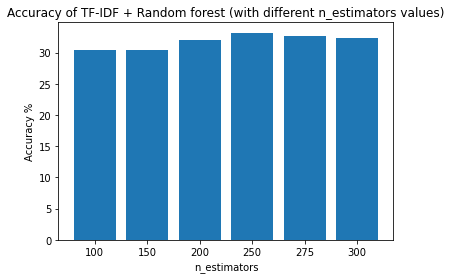

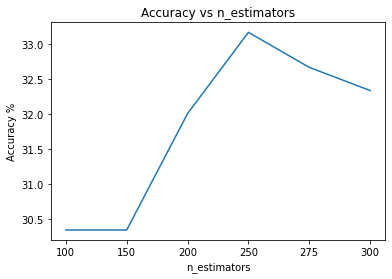

In [12]:
alpha_values = ['100', '150', '200', '250', '275', '300']
accuracies = [ 30.35, 30.35, 32.01, 33.17, 32.67, 32.34]

plt.bar(alpha_values, accuracies)
plt.title('Accuracy of TF-IDF + Random forest (with different n_estimators values)')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy %')
plt.show()
plt.plot(alpha_values, accuracies)
plt.title('Accuracy vs n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy %')
plt.show()

In [13]:
rf_model_counts = RandomForestClassifier(n_estimators=100)
rf_model_counts.fit(X_train_counts, train_df['label'])

# Evaluate the model on the testing set using TF-IDF features
y_pred_rf_counts = rf_model_counts.predict(X_test_counts)

# Calculate accuracy, F1 score, precision, recall
accuracy_rf_counts = accuracy_score(test_df['label'], y_pred_rf_counts)
f1_rf_counts = f1_score(test_df['label'], y_pred_rf_counts, average='macro')
precision_rf_counts = precision_score(test_df['label'], y_pred_rf_counts, average='macro')
recall_rf_counts = recall_score(test_df['label'], y_pred_rf_counts, average='macro')

print("Accuracy using Random Forest(100) and TF-IDF features: {:.2f}%".format(accuracy_rf_counts*100))
print("F1 Score using Random Forest(100) and TF-IDF features: {:.2f}%".format(f1_rf_counts*100))
print("Precision using Random Forest(100) and TF-IDF features: {:.2f}%".format(precision_rf_counts*100))
print("Recall using Random Forest(100) and TF-IDF features: {:.2f}%".format(recall_rf_counts*100))

Accuracy using Random Forest(100) and TF-IDF features: 31.34%
F1 Score using Random Forest(100) and TF-IDF features: 30.24%
Precision using Random Forest(100) and TF-IDF features: 30.78%
Recall using Random Forest(100) and TF-IDF features: 30.66%


In [14]:
rf_model_counts1 = RandomForestClassifier(n_estimators=200)
rf_model_counts1.fit(X_train_counts, train_df['label'])

# Evaluate the model on the testing set using TF-IDF features
y_pred_rf_counts1 = rf_model_counts1.predict(X_test_counts)

# Calculate accuracy, F1 score, precision, recall
accuracy_rf_counts1 = accuracy_score(test_df['label'], y_pred_rf_counts1)
f1_rf_counts1 = f1_score(test_df['label'], y_pred_rf_counts1, average='macro')
precision_rf_counts1 = precision_score(test_df['label'], y_pred_rf_counts1, average='macro')
recall_rf_counts1 = recall_score(test_df['label'], y_pred_rf_counts1, average='macro')

print("Accuracy using Random Forest(200) and bag-of-words features: {:.2f}%".format(accuracy_rf_counts1*100))
print("F1 Score using Random Forest(200) and bag-of-words features: {:.2f}%".format(f1_rf_counts1*100))
print("Precision using Random Forest(200) and bag-of-words features: {:.2f}%".format(precision_rf_counts1*100))
print("Recall using Random Forest(200) and bag-of-words features: {:.2f}%".format(recall_rf_counts1*100))

Accuracy using Random Forest(200) and bag-of-words features: 32.34%
F1 Score using Random Forest(200) and bag-of-words features: 31.50%
Precision using Random Forest(200) and bag-of-words features: 33.82%
Recall using Random Forest(200) and bag-of-words features: 31.73%


In [15]:
rf_model_counts2 = RandomForestClassifier(n_estimators=75)
rf_model_counts2.fit(X_train_counts, train_df['label'])

# Evaluate the model on the testing set using TF-IDF features
y_pred_rf_counts2 = rf_model_counts2.predict(X_test_counts)

# Calculate accuracy, F1 score, precision, recall
accuracy_rf_counts2 = accuracy_score(test_df['label'], y_pred_rf_counts2)
f1_rf_counts2 = f1_score(test_df['label'], y_pred_rf_counts2, average='macro')
precision_rf_counts2 = precision_score(test_df['label'], y_pred_rf_counts2, average='macro')
recall_rf_counts2 = recall_score(test_df['label'], y_pred_rf_counts2, average='macro')

print("Accuracy using Random Forest(75) and bag-of-words features: {:.2f}%".format(accuracy_rf_counts2*100))
print("F1 Score using Random Forest(75) and bag-of-words features: {:.2f}%".format(f1_rf_counts2*100))
print("Precision using Random Forest(75) and bag-of-words features: {:.2f}%".format(precision_rf_counts2*100))
print("Recall using Random Forest(75) and bag-of-words features: {:.2f}%".format(recall_rf_counts2*100))

Accuracy using Random Forest(75) and bag-of-words features: 31.01%
F1 Score using Random Forest(75) and bag-of-words features: 29.96%
Precision using Random Forest(75) and bag-of-words features: 31.26%
Recall using Random Forest(75) and bag-of-words features: 30.39%


In [16]:
rf_model_counts3 = RandomForestClassifier(n_estimators=275)
rf_model_counts3.fit(X_train_counts, train_df['label'])

# Evaluate the model on the testing set using TF-IDF features
y_pred_rf_counts3 = rf_model_counts3.predict(X_test_counts)

# Calculate accuracy, F1 score, precision, recall
accuracy_rf_counts3 = accuracy_score(test_df['label'], y_pred_rf_counts3)
f1_rf_counts3 = f1_score(test_df['label'], y_pred_rf_counts3, average='macro')
precision_rf_counts3 = precision_score(test_df['label'], y_pred_rf_counts3, average='macro')
recall_rf_counts3 = recall_score(test_df['label'], y_pred_rf_counts3, average='macro')

print("Accuracy using Random Forest(275) and bag-of-words features: {:.2f}%".format(accuracy_rf_counts3*100))
print("F1 Score using Random Forest(275) and bag-of-words features: {:.2f}%".format(f1_rf_counts3*100))
print("Precision using Random Forest(275) and bag-of-words features: {:.2f}%".format(precision_rf_counts3*100))
print("Recall using Random Forest(275) and bag-of-words features: {:.2f}%".format(recall_rf_counts3*100))

Accuracy using Random Forest(275) and bag-of-words features: 30.51%
F1 Score using Random Forest(275) and bag-of-words features: 29.45%
Precision using Random Forest(275) and bag-of-words features: 30.42%
Recall using Random Forest(275) and bag-of-words features: 29.81%


In [17]:
rf_model_counts4 = RandomForestClassifier(n_estimators=300)
rf_model_counts4.fit(X_train_counts, train_df['label'])

# Evaluate the model on the testing set using bag-of-words features
y_pred_rf_counts4 = rf_model_counts4.predict(X_test_counts)

# Calculate accuracy, F1 score, precision, recall
accuracy_rf_counts4 = accuracy_score(test_df['label'], y_pred_rf_counts4)
f1_rf_counts4 = f1_score(test_df['label'], y_pred_rf_counts4, average='macro')
precision_rf_counts4 = precision_score(test_df['label'], y_pred_rf_counts4, average='macro')
recall_rf_counts4 = recall_score(test_df['label'], y_pred_rf_counts4, average='macro')

print("Accuracy using Random Forest(300) and bag-of-words features: {:.2f}%".format(accuracy_rf_counts4*100))
print("F1 Score using Random Forest(300) and bag-of-words features: {:.2f}%".format(f1_rf_counts4*100))
print("Precision using Random Forest(300) and bag-of-words features: {:.2f}%".format(precision_rf_counts4*100))
print("Recall using Random Forest(300) and bag-of-words features: {:.2f}%".format(recall_rf_counts4*100))

Accuracy using Random Forest(300) and bag-of-words features: 32.67%
F1 Score using Random Forest(300) and bag-of-words features: 31.65%
Precision using Random Forest(300) and bag-of-words features: 32.96%
Recall using Random Forest(300) and bag-of-words features: 32.03%


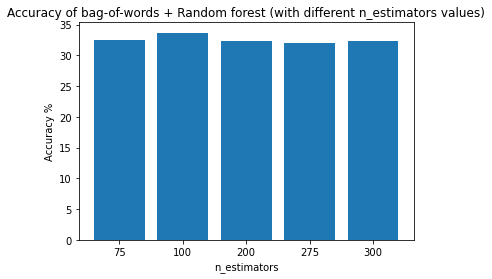

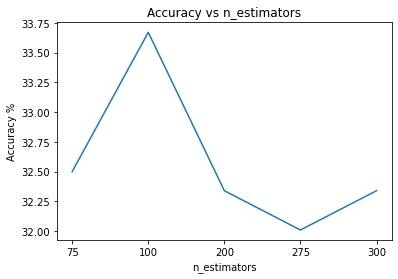

In [18]:
alpha_values = ['75', '100', '200', '275', '300']
accuracies = [ 32.50, 33.67, 32.34, 32.01, 32.34]

plt.bar(alpha_values, accuracies)
plt.title('Accuracy of bag-of-words + Random forest (with different n_estimators values)')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy %')
plt.show()
plt.plot(alpha_values, accuracies)
plt.title('Accuracy vs n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy %')
plt.show()

In [19]:
# # Build a logistic regression model using TF-IDF features
# logreg_model = LogisticRegression()
# logreg_model.fit(X_train_tfidf, train_df['label'])

# Build a logistic regression model using TF-IDF features with different C values
C_values = [0.1, 0.5, 1, 5, 10]
for C in C_values:
    logreg_model = LogisticRegression(C=C)
    logreg_model.fit(X_train_tfidf, train_df['label'])

    # Evaluate the model on the testing set using TF-IDF features
    y_pred_logreg = logreg_model.predict(X_test_tfidf)
    accuracy_logreg = accuracy_score(test_df['label'], y_pred_logreg)

    print("Accuracy using logistic regression and TF-IDF features with C={}:".format(C), accuracy_logreg)


# Evaluate the model on the testing set using TF-IDF features
y_pred_logreg = logreg_model.predict(X_test_tfidf)
accuracy_logreg = accuracy_score(test_df['label'], y_pred_logreg)
print("Accuracy using logistic regression and TF-IDF features:", accuracy_logreg)


# Preprocess the text input
input_text = "I have a solution for this problem"
input_text = input_text.lower()
input_text = ' '.join([word for word in input_text.split() if word not in stop_words])
input_text = word_tokenize(input_text)
input_text = [stemmer.stem(word) for word in input_text]
input_text = ' '.join(input_text)

# Extract features from the preprocessed text input
X_input = tfidf_vectorizer.transform([input_text])

# Predict the label of the input text using the logistic regression model
y_pred_input = logreg_model.predict(X_input)[0]

# Print the predicted label
print("Predicted label for input text:", y_pred_input)

logreg_model = LogisticRegression()
logreg_model.fit(X_train_tfidf, train_df['label'])

rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train_tfidf, train_df['label'])

# Ensemble the models
ensemble_model = VotingClassifier(estimators=[('mnb_counts', mnb_counts_model), 
                                               ('mnb_tfidf', mnb_tfidf_model), 
                                               ('logreg', logreg_model), 
                                               ('rf', rf_model)], 
                                   voting='hard')

ensemble_model.fit(X_train_tfidf, train_df['label'])

# Evaluate the model on the testing set
y_pred_ensemble = ensemble_model.predict(X_test_tfidf)
accuracy_ensemble = accuracy_score(test_df['label'], y_pred_ensemble)
print("Accuracy using ensemble of models:", accuracy_ensemble)

# Preprocess the text input
inp_txt = "I have a solution for this problem"
inp_txt = inp_txt.lower()
inp_txt = ' '.join([word for word in inp_txt.split() if word not in stop_words])
inp_txt = word_tokenize(inp_txt)
inp_txt = [stemmer.stem(word) for word in inp_txt]
inp_txt = ' '.join(inp_txt)

# Extract features from the preprocessed text input
X_inp = tfidf_vectorizer.transform([inp_txt])

# Predict the label of the input text using the logistic regression model
y_pred_inp = ensemble_model.predict(X_inp)[0]

# Print the predicted label
print("Predicted label for input text:", y_pred_inp)

Accuracy using logistic regression and TF-IDF features with C=0.1: 0.3101160862354892
Accuracy using logistic regression and TF-IDF features with C=0.5: 0.3250414593698176
Accuracy using logistic regression and TF-IDF features with C=1: 0.31840796019900497


D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy using logistic regression and TF-IDF features with C=5: 0.3101160862354892


D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy using logistic regression and TF-IDF features with C=10: 0.3067993366500829
Accuracy using logistic regression and TF-IDF features: 0.3067993366500829
Predicted label for input text: Openness
Accuracy using ensemble of models: 0.3283582089552239
Predicted label for input text: Conscientiousness
